In [5]:
import numpy
import cv2
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt


In [6]:
#K.set_image_data_format('channels_first')


In [7]:
# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [9]:
type(X_train)

numpy.ndarray

In [10]:
# Reshape to be samples*pixels*width*height
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [11]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


In [12]:
# One Hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [13]:
# Create a convolutional neural network model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu',data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.4356 - acc: 0.8667 - val_loss: 0.1385 - val_acc: 0.9593
Epoch 2/10
60000/60000 [==============================] - 59s 978us/step - loss: 0.1357 - acc: 0.9588 - val_loss: 0.0828 - val_acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 59s 983us/step - loss: 0.0933 - acc: 0.9715 - val_loss: 0.0569 - val_acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 59s 977us/step - loss: 0.0754 - acc: 0.9769 - val_loss: 0.0503 - val_acc: 0.9838
Epoch 5/10
60000/60000 [==============================] - 60s 993us/step - loss: 0.0626 - acc: 0.9803 - val_loss: 0.0472 - val_acc: 0.9850
Epoch 6/10
60000/60000 [=========

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 1.14%


In [15]:
#  - - - - - - - TEST single image - - - - - - - -

image = (X_test[1]).reshape(1,1,28,28) # 1->'2';    
model_pred = model.predict_classes(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))


Prediction of model: 2


In [16]:
# - - - - - - TESTING multiple image - - - - - - - - - -

test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))

Test images shape: (4, 28, 28)


Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


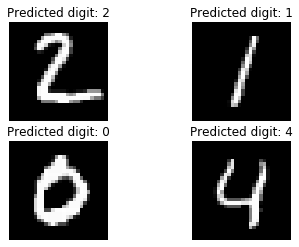

In [17]:
for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,1,28,28)
    prediction = model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

In [21]:
# serialize model to JSON
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")
model.save('path_to_saved_model', save_format='tf')

Saved model to disk


TypeError: save() got an unexpected keyword argument 'save_format'